In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
import pandas_datareader as web
import datetime as dt

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [44]:
company = 'FB'

In [45]:
start = dt.datetime(2016,1,1)

In [46]:
end = dt.datetime(2022,1,1)

In [47]:
data = web.DataReader(company, 'yahoo', start, end)

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))

In [65]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [50]:
prediction_days = 60

In [51]:
x_train = []

In [52]:
y_train = []

In [53]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

In [54]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [56]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [57]:
model = Sequential()

In [58]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

In [59]:
model.add(Dropout(0.2))

In [60]:
model.add(LSTM(units=50, return_sequences=True))

In [61]:
model.add(Dropout(0.2))

In [64]:
model.add(LSTM(units=50))

In [63]:
model.add(Dropout(0.2))

In [66]:
model.add(Dense(units=1))

In [69]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 3s 30ms/step - loss: 0.0868
Epoch 2/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0285
Epoch 3/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0199
Epoch 4/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0172
Epoch 5/25
6/6 [==============================] - 0s 29ms/step - loss: 0.0169
Epoch 6/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0131
Epoch 7/25
6/6 [==============================] - 0s 31ms/step - loss: 0.0115
Epoch 8/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0111
Epoch 9/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0106
Epoch 10/25
6/6 [==============================] - 0s 30ms/step - loss: 0.0094
Epoch 11/25
6/6 [==============================] - 0s 29ms/step - loss: 0.0099
Epoch 12/25
6/6 [==============================] - 0s 29ms/step - loss: 0.0099
Epoch 13/25
6/6 [==============================] - 0s 30ms/st

In [71]:
test_start = dt.datetime(2022,1,1)

In [72]:
test_end = dt.datetime.now()

In [74]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

In [75]:
actual_prices = test_data['Close'].values

In [76]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [77]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

model_inputs = model_inputs.reshape(-1,1)

In [78]:
model_inputs = model_inputs.reshape(-1,1)

In [79]:
model_inputs = scaler.transform(model_inputs)

In [80]:
x_test = []

In [81]:
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [82]:
x_test = np.array(x_test)

In [84]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [85]:
predicted_prices = model.predict(x_test)

8/8 [==============================] - 1s 12ms/step


In [86]:
predicted_prices = scaler.inverse_transform(predicted_prices)

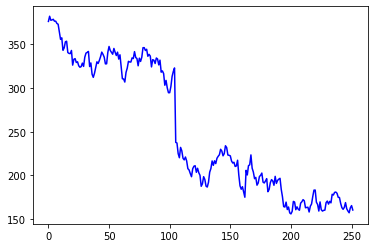

In [90]:
plt.plot(actual_prices, color="blue", label=f"Actual {company} price")

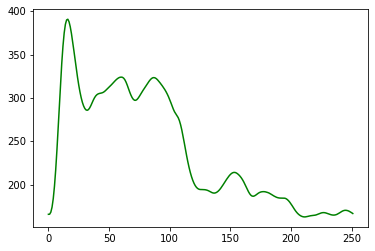

In [91]:
plt.plot(predicted_prices, color="green", label=f"predicted {company} prices")

Text(0.5, 1.0, 'FB Share Price')

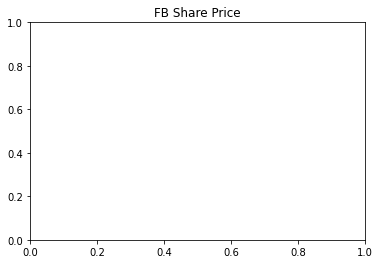

In [92]:
plt.title(f"{company} Share Price")

Text(0.5, 0, 'Time')

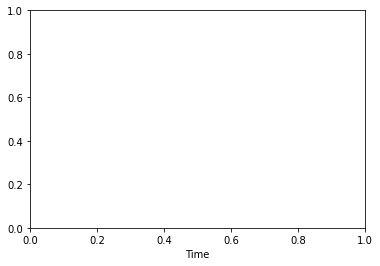

In [93]:
plt.xlabel('Time')

Text(0, 0.5, 'FB Share Price')

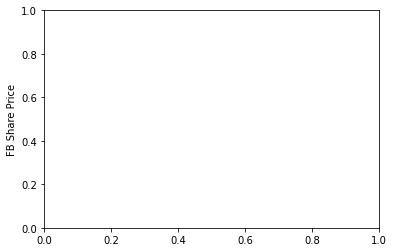

In [94]:
plt.ylabel(f'{company} Share Price')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


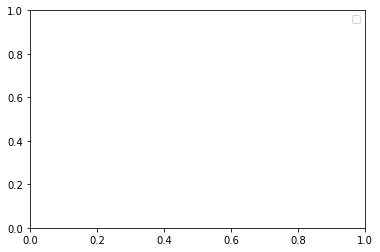

In [95]:
plt.legend()

In [96]:
plt.show()

In [98]:
real_data= [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]

In [99]:
real_data = np.array(real_data)

In [100]:
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [101]:
prediction = model.predict(real_data)

1/1 [==============================] - 1s 822ms/step


In [102]:
prediction = scaler.inverse_transform(prediction)

In [103]:
print(f"Prediction: {prediction}")

Prediction: [[165.94882]]
